In [1]:
#We need all these imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#We need this vectorised function to calculate the absolute magnitude
#of the acceleration in STEP 8.
#Sample usage:
#df['absmag'] = vector_abs(df['col a'], df['col b'], df['col c'])
#Where col a, b and c are any 3 columns already in the dataframe

def abs_accel_mag(x, y, z):
    return math.sqrt(x**2 + y**2 + z**2)

vector_abs = np.vectorize(abs_accel_mag)

In [2]:
#STEP 1. [3 marks] Load all the CSV data into its own DataFrame. Print df.describe(), df.columns() and df.head(20).
df = pd.read_csv("FrontHull30.csv")
df.describe()

,epoch (ms),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
count,1.904000e+04,19040.000000,19040.000000,19040.000000,19040.000000
mean,1.560000e+12,1866.976757,0.036640,0.021878,0.045674
std,0.000000e+00,54.271635,0.069983,0.150381,0.664837
min,1.560000e+12,1772.983000,-0.523000,-1.104000,-2.456000
25%,1.560000e+12,1819.979500,-0.006000,-0.058000,-0.367000
50%,1.560000e+12,1866.977000,0.028000,0.021000,-0.039000
75%,1.560000e+12,1913.973250,0.067000,0.100000,0.313250
max,1.560000e+12,1960.971000,0.851000,2.467000,10.509000


In [3]:
df.columns

Index(['epoch (ms)', 'time (-00:00)', 'elapsed (s)', 'x-axis (g)',
       'y-axis (g)', 'z-axis (g)'],
      dtype='object')

In [4]:
df.head(20)

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1.560000e+12,2019-06-26T11:48:09.005,1772.983,-0.048,-0.101,-0.002
1,1.560000e+12,2019-06-26T11:48:09.015,1772.993,0.000,-0.051,-0.077
2,1.560000e+12,2019-06-26T11:48:09.025,1773.003,0.037,0.050,0.075
3,1.560000e+12,2019-06-26T11:48:09.034,1773.012,-0.053,-0.053,-0.084
4,1.560000e+12,2019-06-26T11:48:09.044,1773.022,-0.035,-0.050,-0.109
5,1.560000e+12,2019-06-26T11:48:09.053,1773.031,0.035,-0.006,-0.080
6,1.560000e+12,2019-06-26T11:48:09.063,1773.041,-0.007,0.033,0.079
7,1.560000e+12,2019-06-26T11:48:09.074,1773.052,-0.038,-0.091,-0.176
8,1.560000e+12,2019-06-26T11:48:09.084,1773.062,0.003,-0.083,-0.024
9,1.560000e+12,2019-06-26T11:48:09.093,1773.071,0.017,0.041,-0.082


<AxesSubplot: >

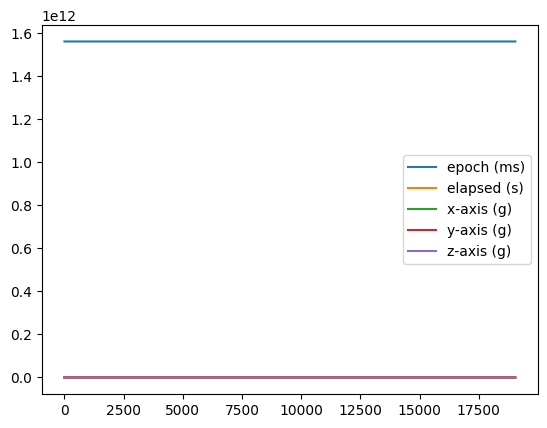

In [5]:
#STEP 2. [3 marks] Plot the data. What do you observe? Take a screenshot and write down your observations.
df.plot()

<AxesSubplot: >

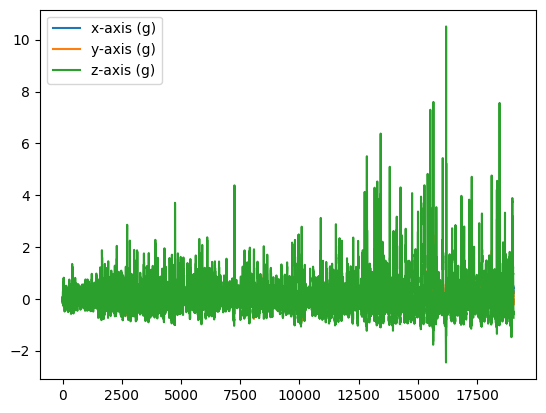

In [6]:
#STEP 3. [4 marks] Exclude everything but the acceleration on the x, y and z axes and replot the data. Take a screenshot.
df_xyz = df[['x-axis (g)', 'y-axis (g)', 'z-axis (g)']]
df_xyz.plot()

,x-axis (g),y-axis (g),z-axis (g)
0,-0.048,-0.101,-0.002
1,0.000,-0.051,-0.077
2,0.037,0.050,0.075
3,-0.053,-0.053,-0.084
4,-0.035,-0.050,-0.109
5,0.035,-0.006,-0.080
6,-0.007,0.033,0.079
7,-0.038,-0.091,-0.176
8,0.003,-0.083,-0.024
9,0.017,0.041,-0.082


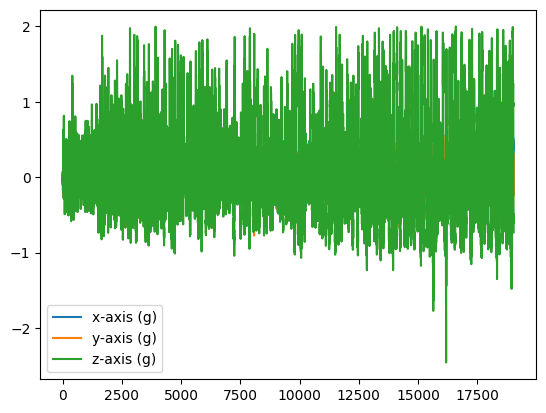

In [7]:
#STEP 4. [4 marks] Apply a filter or filters to the xyz data to get measurements LESS than 2g on the Z-axis. Plot it again. Take a screenshot. Print the first 20 rows of the filtered data.
z_is_lessthan_2 = df_xyz['z-axis (g)'] < 2.00
df_xyz_filtered = df_xyz[z_is_lessthan_2]
df_xyz_filtered.plot()
df_xyz_filtered.head(20)

<AxesSubplot: >

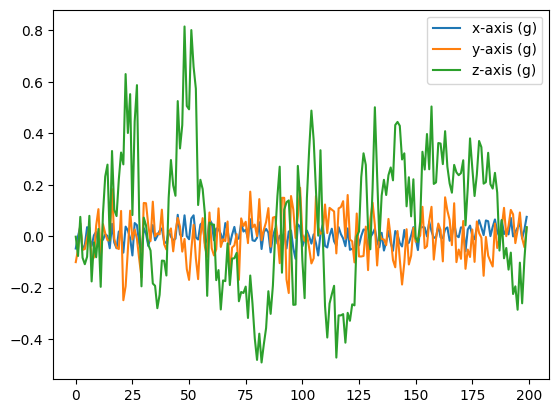

In [8]:
#STEP 5. [4 marks] Repeat the plot in (4) but limit the range to the first 200 readings. Take a screenshot. What do you observe?
df_xyz_filtered.iloc[0:200].plot()

<AxesSubplot: >

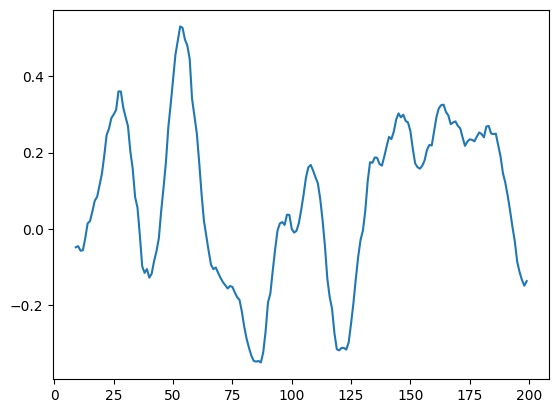

In [9]:
#STEP 6. The sensor samples data 100 times a second. Use the function df.colname.rolling(window=n).mean() to smooth the plot by getting a moving average over n samples for a column called "colname." (10 is suggested.) Use the same 200 sample range as step (5). Take a screenshot.
df_xyz_filtered['z-axis (g)'].iloc[0:200].rolling(window=10).mean().plot()

In [10]:
#STEP 7. Using the dataframe from Step 3, print the maximum and minimum acceleration values for the x, y and z axes.
df_xyz.min()

x-axis (g)   -0.523
y-axis (g)   -1.104
z-axis (g)   -2.456
dtype: float64

In [11]:
df_xyz.max()

x-axis (g)     0.851
y-axis (g)     2.467
z-axis (g)    10.509
dtype: float64

In [12]:
#STEP 8. Using the dataframe from Step 3, calculate the absolute magnitude of acceleration (see function definition at start).
#Put the result in a new column. Ignore the warning. Print the dataframe. Screenshot the result.

df_xyz['absmag'] = vector_abs(df_xyz['x-axis (g)'], df_xyz['y-axis (g)'], df_xyz['z-axis (g)'])
df_xyz

C:\Users\Govind\AppData\Local\Temp\ipykernel_676\2873994643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xyz['absmag'] = vector_abs(df_xyz['x-axis (g)'], df_xyz['y-axis (g)'], df_xyz['z-axis (g)'])


,x-axis (g),y-axis (g),z-axis (g),absmag
0,-0.048,-0.101,-0.002,0.111844
1,0.000,-0.051,-0.077,0.092358
2,0.037,0.050,0.075,0.097437
3,-0.053,-0.053,-0.084,0.112579
4,-0.035,-0.050,-0.109,0.124924
...,...,...,...,...
19035,0.263,-0.201,-0.605,0.689634
19036,0.195,-0.006,-0.523,0.558202
19037,0.258,-0.120,-0.485,0.562307
19038,0.209,-0.137,-0.521,0.577833


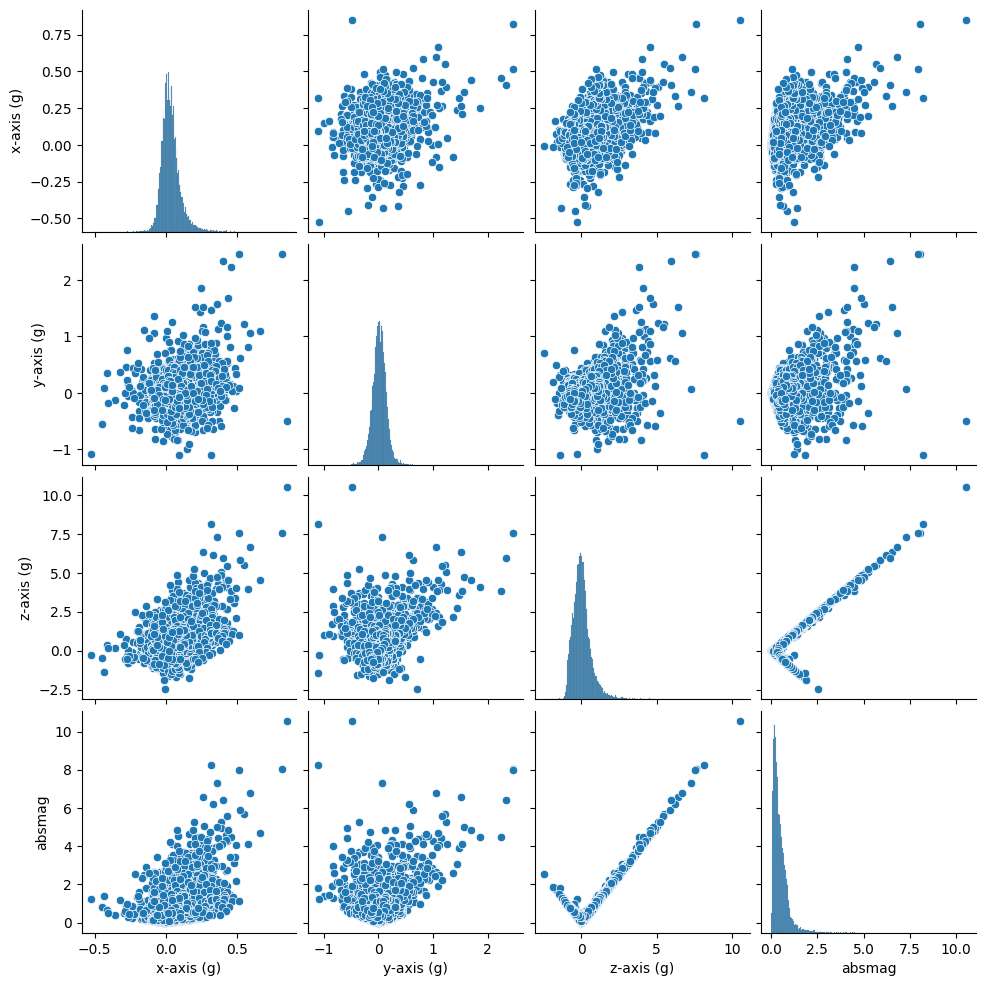

In [13]:
#Step 9. Using Seaborn, produce a pairplot of df_xyz. Inspect the pairplot. Which of the 3 axes (x, y and z) correlates most strongly with the absolute magnitude?
#Knowing the sensor was mounted in a boat, comment on why, possibly, this particular axis contributed most to the absolute magnitude?
sns.pairplot(df_xyz)

In [14]:
#STEP 10. Comment on this process (one paragraph). What was the most difficult step? What was the easiest? What have you learned from the
#data? What have you learned from this exercise? Do you think this process could be applied elsewhere?